In [4]:
!pip install numpy
!pip install pandas
!pip install seaborn
!pip install statsmodels
!pip install matplotlib
!pip install feature-engine
!pip install scikit-learn
!pip install xgboost





[notice] A new release of pip is available: 23.0.1 -> 23.2.1
[notice] To update, run: pip install --upgrade pip

[notice] A new release of pip is available: 23.0.1 -> 23.2.1
[notice] To update, run: pip install --upgrade pip

[notice] A new release of pip is available: 23.0.1 -> 23.2.1
[notice] To update, run: pip install --upgrade pip

[notice] A new release of pip is available: 23.0.1 -> 23.2.1
[notice] To update, run: pip install --upgrade pip

[notice] A new release of pip is available: 23.0.1 -> 23.2.1
[notice] To update, run: pip install --upgrade pip

[notice] A new release of pip is available: 23.0.1 -> 23.2.1
[notice] To update, run: pip install --upgrade pip

[notice] A new release of pip is available: 23.0.1 -> 23.2.1
[notice] To update, run: pip install --upgrade pip

[notice] A new release of pip is available: 23.0.1 -> 23.2.1
[notice] To update, run: pip install --upgrade pip


In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import statsmodels.api as sm
import matplotlib.pyplot as plt
import feature_engine
import sklearn
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectFromModel
from sklearn.model_selection import train_test_split, GridSearchCV




### Hyperparameter Optimization ---- Model is fitted using cross validation. 
#### GridSearchCV ---- Fits multiple models looping through a hyperparameter list over the model. 

In [34]:
data_url = "https://raw.githubusercontent.com/selva86/datasets/master/BostonHousing.csv"

# Read the dataset into a DataFrame
df = pd.read_csv(data_url)

# Rename the 'price' column to 'target' in the original DataFrame
df.rename(columns={'medv': 'price'}, inplace=True)
df = df.sample(frac=0.5, random_state=101)

# Display the modified DataFrame
df.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,price
195,0.01381,80.0,0.46,0,0.422,7.875,32.0,5.6484,4,255,14.4,394.23,2.97,50.0
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
434,13.91340,0.0,18.10,0,0.713,6.208,95.0,2.2222,24,666,20.2,100.63,15.17,11.7
458,7.75223,0.0,18.10,0,0.713,6.301,83.7,2.7831,24,666,20.2,272.21,16.23,14.9
39,0.02763,75.0,2.95,0,0.428,6.595,21.8,5.4011,3,252,18.3,395.63,4.32,30.8


In [35]:
X_train, X_test, y_train, y_test = train_test_split(
                                        df.drop(['price'], axis=1),
                                        df['price'],
                                        test_size=0.2,
                                        random_state=(101))
print("* Train set:", X_train.shape, y_train.shape,"\n* Test set:", X_test.shape, y_test.shape)         



* Train set: (202, 13) (202,) 
* Test set: (51, 13) (51,)


In [11]:
# ML Algorithms 
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor

In [37]:
def pipeline_random_forest_reg():
    pipeline = Pipeline([
        ("feature_scaling", StandardScaler()),
        ("feature_selection", SelectFromModel(RandomForestRegressor(random_state=101))),
        ("model", RandomForestRegressor(random_state=101)),
    ])
    return pipeline

In [38]:
param_grid = {"model__n_estimators": [50]}


In [39]:
grid = GridSearchCV(estimator=pipeline_random_forest_reg(),
                    param_grid = param_grid,
                    cv = 2,
                    n_jobs = -2,
                    verbose = 3,
                    scoring = 'r2')

grid.fit(X_train, y_train)                    

Fitting 2 folds for each of 1 candidates, totalling 2 fits
[CV 2/2] END ............model__n_estimators=50;, score=0.687 total time=   0.2s
[CV 1/2] END ............model__n_estimators=50;, score=0.613 total time=   0.2s


GridSearchCV(cv=2,
             estimator=Pipeline(steps=[('feature_scaling', StandardScaler()),
                                       ('feature_selection',
                                        SelectFromModel(estimator=RandomForestRegressor(random_state=101))),
                                       ('model',
                                        RandomForestRegressor(random_state=101))]),
             n_jobs=-2, param_grid={'model__n_estimators': [50]}, scoring='r2',
             verbose=3)

In [40]:
grid.cv_results_

{'mean_fit_time': array([0.16804981]),
 'std_fit_time': array([0.00113583]),
 'mean_score_time': array([0.01307869]),
 'std_score_time': array([0.00020957]),
 'param_model__n_estimators': masked_array(data=[50],
              mask=[False],
        fill_value='?',
             dtype=object),
 'params': [{'model__n_estimators': 50}],
 'split0_test_score': array([0.61286478]),
 'split1_test_score': array([0.68655614]),
 'mean_test_score': array([0.64971046]),
 'std_test_score': array([0.03684568]),
 'rank_test_score': array([1], dtype=int32)}

In [15]:

def pipeline_random_forest_reg():
    pipeline = Pipeline([
        ("feature_scaling", StandardScaler()),
        ("feature_selection", SelectFromModel(RandomForestRegressor(random_state=101))),
        ("model", RandomForestRegressor(random_state=101)),
    ])
    return pipeline

# Define the parameter grid with the correct parameter name
param_grid = {"model__n_estimators": [10, 20]}

# Create the pipeline
pipeline = pipeline_random_forest_reg()

# Create the GridSearchCV object
grid = GridSearchCV(estimator=pipeline,
                    param_grid=param_grid,
                    cv=2,
                    n_jobs=-2,
                    verbose=3,
                    scoring='r2')

# Fit the GridSearchCV to perform hyperparameter tuning
grid.fit(X_train, y_train)

Fitting 2 folds for each of 2 candidates, totalling 4 fits
[CV 2/2] END ............model__n_estimators=10;, score=0.695 total time=   0.1s
[CV 1/2] END ............model__n_estimators=20;, score=0.590 total time=   0.2s
[CV 2/2] END ............model__n_estimators=20;, score=0.675 total time=   0.1s
[CV 1/2] END ............model__n_estimators=10;, score=0.618 total time=   0.2s


GridSearchCV(cv=2,
             estimator=Pipeline(steps=[('feature_scaling', StandardScaler()),
                                       ('feature_selection',
                                        SelectFromModel(estimator=RandomForestRegressor(random_state=101))),
                                       ('model',
                                        RandomForestRegressor(random_state=101))]),
             n_jobs=-2, param_grid={'model__n_estimators': [10, 20]},
             scoring='r2', verbose=3)

In [41]:
(pd.DataFrame(grid.cv_results_)
.sort_values(by="mean_test_score", ascending=False)
.filter(['params', 'mean_test_score'])
.values
)

array([[{'model__n_estimators': 50}, 0.6497104598667411]], dtype=object)

In [42]:
grid.best_params_

{'model__n_estimators': 50}

In [26]:
grid.best_estimator_

Pipeline(steps=[('feature_scaling', StandardScaler()),
                ('feature_selection',
                 SelectFromModel(estimator=RandomForestRegressor(random_state=101))),
                ('model',
                 RandomForestRegressor(n_estimators=50, random_state=101))])

In [43]:
pipeline = grid.best_estimator_
pipeline

Pipeline(steps=[('feature_scaling', StandardScaler()),
                ('feature_selection',
                 SelectFromModel(estimator=RandomForestRegressor(random_state=101))),
                ('model',
                 RandomForestRegressor(n_estimators=50, random_state=101))])

### Regression Evaluation

In [44]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

def regression_performance(X_train, y_train, X_test, y_test, pipeline):
    print("Model Evaluation")
    print("* Train Set")
    regression_evaluation(X_train, y_train, pipeline)
    print("* Test Set")
    regression_evaluation(X_test, y_test, pipeline)

def regression_evaluation(X, y, pipeline):
    prediction = pipeline.predict(X)
    print('R2 Score:', r2_score(y, prediction).round(3))
    print('Mean Absolute Error:', mean_absolute_error(y, prediction).round(3))
    print('Mean Squared Error:', mean_squared_error(y, prediction).round(3))
    print('Root Mean Squared Error:', np.sqrt(mean_squared_error(y, prediction)).round(3))
    print("\n")

def regression_evaluation_plots(X_train, y_train, X_test, y_test, pipeline, alpha_scatter=0.5):
    pred_train = pipeline.predict(X_train)
    pred_test = pipeline.predict(X_test)
    
    fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 6))
    
    sns.scatterplot(x=y_train, y=pred_train, alpha=alpha_scatter, ax=axes[0])
    sns.lineplot(x=y_train, y=y_train, color='red', ax=axes[0])
    
    fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 6))
    
    sns.scatterplot(x=y_train, y=pred_train, alpha=alpha_scatter, ax=axes[0])
    sns.lineplot(x=y_train, y=y_train, color='red', ax=axes[0])
    axes[0].set_xlabel("Actual")
    axes[0].set_ylabel("Predictions")
    axes[0].set_title("Train Set")
    
    sns.scatterplot(x=y_test, y=pred_test, alpha=alpha_scatter, ax=axes[1])
    sns.lineplot(x=y_test, y=y_test, color='red', ax=axes[1])
    axes[1].set_xlabel("Actual")
    axes[1].set_ylabel("Predictions")
    axes[1].set_title("Test Set")
    
    plt.show()


Model Evaluation
* Train Set
R2 Score: 0.938
Mean Absolute Error: 1.511
Mean Squared Error: 6.301
Root Mean Squared Error: 2.51


* Test Set
R2 Score: 0.685
Mean Absolute Error: 3.639
Mean Squared Error: 25.895
Root Mean Squared Error: 5.089




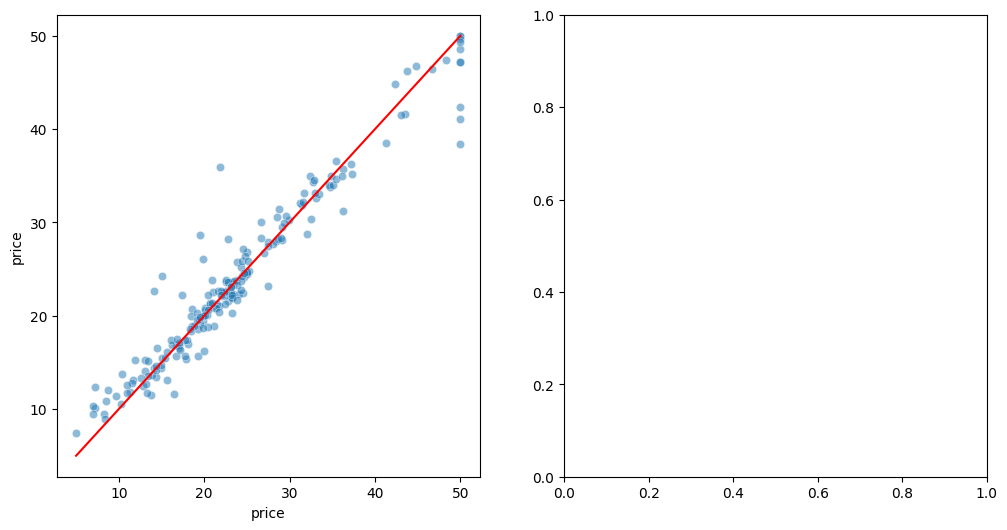

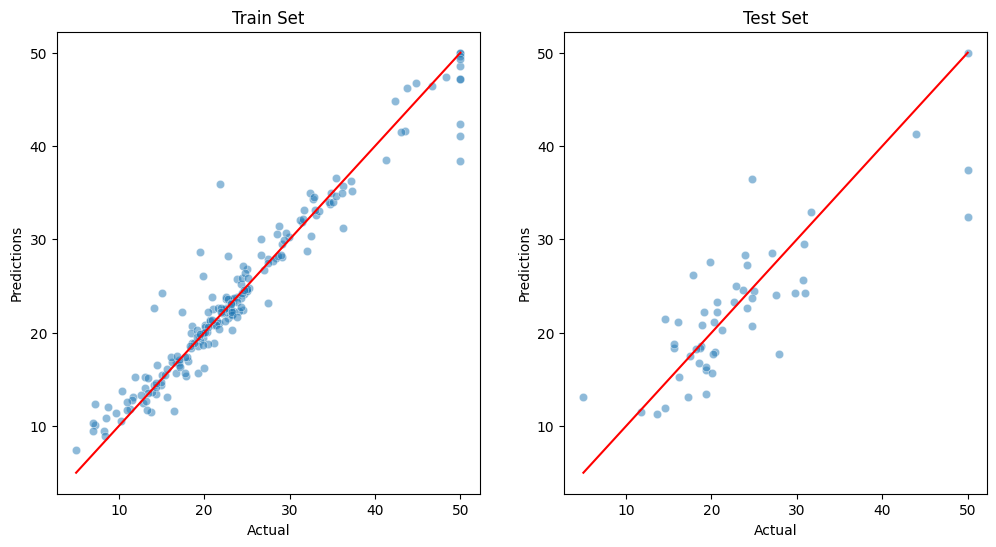

In [16]:
regression_performance(X_train, y_train, X_test, y_test, pipeline)
regression_evaluation_plots(X_train, y_train, X_test, y_test, pipeline, alpha_scatter=0.5)

### Binary Classification Cross Validation

In [4]:
from sklearn.datasets import load_breast_cancer
data = load_breast_cancer()
df = pd.DataFrame(data.data, columns=data.feature_names)
df['target'] = pd.Series(data.target)
df = df.sample(frac=0.5, random_state=101)
print(df.shape)
df.head()

(284, 31)


,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
107,12.36,18.54,79.01,466.7,0.08477,0.06815,0.02643,0.01921,0.1602,0.06066,...,27.49,85.56,544.1,0.11840,0.19630,0.19370,0.08442,0.2983,0.07185,1
437,14.04,15.98,89.78,611.2,0.08458,0.05895,0.03534,0.02944,0.1714,0.05898,...,21.58,101.20,750.0,0.11950,0.12520,0.11170,0.07453,0.2725,0.07234,1
195,12.91,16.33,82.53,516.4,0.07941,0.05366,0.03873,0.02377,0.1829,0.05667,...,22.00,90.81,600.6,0.10970,0.15060,0.17640,0.08235,0.3024,0.06949,1
141,16.11,18.05,105.10,813.0,0.09721,0.11370,0.09447,0.05943,0.1861,0.06248,...,25.27,129.00,1233.0,0.13140,0.22360,0.28020,0.12160,0.2792,0.08158,0
319,12.43,17.00,78.60,477.3,0.07557,0.03454,0.01342,0.01699,0.1472,0.05561,...,20.21,81.76,515.9,0.08409,0.04712,0.02237,0.02832,0.1901,0.05932,1


In [5]:
X_train, X_test, y_train, y_test = train_test_split(
                                        df.drop(['target'], axis=1),
                                        df['target'],
                                        test_size=0.2,
                                        random_state=(101))
print("* Train set:", X_train.shape, y_train.shape,"\n* Test set:", X_test.shape, y_test.shape)         



* Train set: (227, 30) (227,) 
* Test set: (57, 30) (57,)


In [6]:
def pipeline_random_forest_clf():
    pipeline = Pipeline([
        ("feature_scaling", StandardScaler()),
        ("feature_selection", SelectFromModel(RandomForestClassifier(random_state=101))),
        ("model", RandomForestClassifier(random_state=101)),
    ])
    return pipeline

In [8]:
param_grid = {"model__n_estimators":[50,20],}
param_grid

{'model__n_estimators': [50, 20]}

In [9]:
from sklearn.metrics import recall_score, f1_score, precision_score, make_scorer

In [12]:
grid = GridSearchCV(estimator=pipeline_random_forest_clf(),
                    param_grid = param_grid,
                    cv = 2,
                    n_jobs = -2,
                    verbose = 3,
                    scoring = make_scorer(recall_score, pos_label=0))

grid.fit(X_train, y_train)                    

Fitting 2 folds for each of 2 candidates, totalling 4 fits
[CV 2/2] END ............model__n_estimators=20;, score=0.953 total time=   0.2s
[CV 1/2] END ............model__n_estimators=50;, score=0.767 total time=   0.2s
[CV 1/2] END ............model__n_estimators=20;, score=0.767 total time=   0.2s
[CV 2/2] END ............model__n_estimators=50;, score=0.953 total time=   0.2s


GridSearchCV(cv=2,
             estimator=Pipeline(steps=[('feature_scaling', StandardScaler()),
                                       ('feature_selection',
                                        SelectFromModel(estimator=RandomForestClassifier(random_state=101))),
                                       ('model',
                                        RandomForestClassifier(random_state=101))]),
             n_jobs=-2, param_grid={'model__n_estimators': [50, 20]},
             scoring=make_scorer(recall_score, pos_label=0), verbose=3)

In [13]:
(pd.DataFrame(grid.cv_results_)
.sort_values(by="mean_test_score", ascending=False)
.filter(['params', 'mean_test_score'])
.values
)

array([[{'model__n_estimators': 50}, 0.8604651162790697],
       [{'model__n_estimators': 20}, 0.8604651162790697]], dtype=object)

In [14]:
grid.best_params_

{'model__n_estimators': 50}

In [15]:
pipeline = grid.best_estimator_
pipeline

Pipeline(steps=[('feature_scaling', StandardScaler()),
                ('feature_selection',
                 SelectFromModel(estimator=RandomForestClassifier(random_state=101))),
                ('model',
                 RandomForestClassifier(n_estimators=50, random_state=101))])

In [26]:
from sklearn.metrics import classification_report, confusion_matrix

def confusion_matrix_and_report(X, y, pipeline, label_map):
    # Gets features, target, pipeline, and how the levels from your target are labeled (named)
    # in this case, 0 (Malignant) and 1 (Benign), so you parse a list ['Malignant', 'Benign']
    
    # Predict based on features
    prediction = pipeline.predict(X)

    print('--- Confusion Matrix ---')
    print(pd.DataFrame(confusion_matrix(y_true=prediction, y_pred=y),
                       columns=[["Actual " + sub for sub in label_map]],
                       index=[["Prediction " + sub for sub in label_map]]))
    print("\n")
    
    print('--- Classification Report ---')
    print(classification_report(y, prediction, target_names=label_map))
    print("\n")


def clf_performance(X_train, y_train, X_test, y_test, pipeline, label_map):
    # Gets the features and target from the train and test set, pipeline, and how
    # you labeled (named) the levels from your target
    # in this case, 0 (Malignant) and 1 (Benign), so you parse a list ['Malignant', 'Benign']
    
    print("#### Train Set ####")
    confusion_matrix_and_report(X_train, y_train, pipeline, label_map)

    print("#### Test Set ####")
    confusion_matrix_and_report(X_test, y_test, pipeline, label_map)

In [22]:
clf_performance(X_train=X_train, y_train=y_train,
                X_test=X_test, y_test=y_test,
                pipeline=pipeline,
                label_map=['Malignant', 'Benign'])

#### Train Set ####
--- Confusion Matrix ---
                     Actual Malignant Actual Benign
Prediction Malignant               86             0
Prediction Benign                   0           141


--- Classification Report ---
              precision    recall  f1-score   support

   Malignant       1.00      1.00      1.00        86
      Benign       1.00      1.00      1.00       141

    accuracy                           1.00       227
   macro avg       1.00      1.00      1.00       227
weighted avg       1.00      1.00      1.00       227



#### Test Set ####
--- Confusion Matrix ---
                     Actual Malignant Actual Benign
Prediction Malignant               19             0
Prediction Benign                   2            36


--- Classification Report ---
              precision    recall  f1-score   support

   Malignant       1.00      0.90      0.95        21
      Benign       0.95      1.00      0.97        36

    accuracy                           0.9

### Multivariable Classification Cross Validation

In [25]:
df = sns.load_dataset('iris')
print(df.shape)
df.head()

(150, 5)


,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [26]:
X_train, X_test, y_train, y_test = train_test_split(
                                        df.drop(['species'], axis=1),
                                        df['species'],
                                        test_size=0.2,
                                        random_state=(101))
print("* Train set:", X_train.shape, y_train.shape,"\n* Test set:", X_test.shape, y_test.shape)         



* Train set: (120, 4) (120,) 
* Test set: (30, 4) (30,)


In [27]:
def pipeline_random_forest_clf():
    pipeline = Pipeline([
        ("feature_scaling", StandardScaler()),
        ("feature_selection", SelectFromModel(RandomForestClassifier(random_state=101))),
        ("model", RandomForestClassifier(random_state=101)),
    ])
    return pipeline

In [28]:
param_grid = {"model__n_estimators":[10,20],}
param_grid

{'model__n_estimators': [10, 20]}

In [31]:
grid = GridSearchCV(estimator=pipeline_random_forest_clf(),
                    param_grid = param_grid,
                    cv = 2,
                    n_jobs = -2,
                    verbose = 3,
                    scoring = make_scorer(precision_score, labels=['virginica'], average=None)
)

grid.fit(X_train, y_train)                    

Fitting 2 folds for each of 2 candidates, totalling 4 fits
[CV 2/2] END ............model__n_estimators=10;, score=0.833 total time=   0.4s
[CV 1/2] END ............model__n_estimators=10;, score=1.000 total time=   0.4s
[CV 2/2] END ............model__n_estimators=20;, score=0.833 total time=   0.5s
[CV 1/2] END ............model__n_estimators=20;, score=1.000 total time=   0.5s


GridSearchCV(cv=2,
             estimator=Pipeline(steps=[('feature_scaling', StandardScaler()),
                                       ('feature_selection',
                                        SelectFromModel(estimator=RandomForestClassifier(random_state=101))),
                                       ('model',
                                        RandomForestClassifier(random_state=101))]),
             n_jobs=-2, param_grid={'model__n_estimators': [10, 20]},
             scoring=make_scorer(precision_score, labels=['virginica'], average=None),
             verbose=3)

In [32]:
(pd.DataFrame(grid.cv_results_)
.sort_values(by="mean_test_score", ascending=False)
.filter(['params', 'mean_test_score'])
.values
)

array([[{'model__n_estimators': 10}, 0.9166666666666667],
       [{'model__n_estimators': 20}, 0.9166666666666667]], dtype=object)

In [33]:
pipeline = grid.best_estimator_
pipeline

Pipeline(steps=[('feature_scaling', StandardScaler()),
                ('feature_selection',
                 SelectFromModel(estimator=RandomForestClassifier(random_state=101))),
                ('model',
                 RandomForestClassifier(n_estimators=10, random_state=101))])

In [42]:
clf_performance(X_train=X_train, y_train=y_train,
                X_test=X_test, y_test=y_test,
                pipeline=pipeline,
                label_map=df['species'].unique())

#### Train Set ####
--- Confusion Matrix ---
                      Actual setosa Actual versicolor Actual virginica
Prediction setosa                40                 0                0
Prediction versicolor             0                36                0
Prediction virginica              0                 2               42


--- Classification Report ---
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        40
  versicolor       1.00      0.95      0.97        38
   virginica       0.95      1.00      0.98        42

    accuracy                           0.98       120
   macro avg       0.98      0.98      0.98       120
weighted avg       0.98      0.98      0.98       120



#### Test Set ####
--- Confusion Matrix ---
                      Actual setosa Actual versicolor Actual virginica
Prediction setosa                10                 0                0
Prediction versicolor             0                12                0

### Cross Validation search with multiple Algorithms and Hyperparameters

In [40]:
df = sns.load_dataset('penguins')
print(df.shape)
df

(344, 7)


,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female
...,...,...,...,...,...,...,...
339,Gentoo,Biscoe,NaN,NaN,NaN,NaN,NaN
340,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,Female
341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,Male
342,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,Female


In [41]:
X_train, X_test, y_train, y_test = train_test_split(
                                        df.drop(['species'], axis=1),
                                        df['species'],
                                        test_size=0.2,
                                        random_state=(101))
print("* Train set:", X_train.shape, y_train.shape,"\n* Test set:", X_test.shape, y_test.shape)         



* Train set: (275, 6) (275,) 
* Test set: (69, 6) (69,)


In [42]:
from feature_engine.imputation import MeanMedianImputer
from feature_engine.imputation import CategoricalImputer
from feature_engine.encoding import OrdinalEncoder

In [43]:
# ML Algorithms 
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import AdaBoostClassifier
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import ExtraTreesClassifier


In [44]:
def PipelineOptimization(model):
    pipeline_base = Pipeline([
        ('median', MeanMedianImputer(imputation_method='median',
                                     variables=['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g'])),
        ('categorical_imputer', CategoricalImputer(imputation_method='frequent',
                                                                variables=['sex'])),
        ('ordinal', OrdinalEncoder(encoding_method='arbitrary',
                                    variables=['island', 'sex'])),
        ('feat_scaling', StandardScaler()),
        ('feat_selection', SelectFromModel(model)),
        ('model', model)                                                                                                                                         
    ])  

    return pipeline_base    

In [45]:
class HyperparameterOptimizationSearch:

    def __init__(self, models, params):
        self.models = models
        self.params = params
        self.keys = models.keys()
        self.grid_searches = {}

    def fit(self, X, y, cv, n_jobs, verbose=1, scoring=None, refit=False):
        for key in self.keys:
            print(f"\nRunning GridSearchCV for {key}\n")
            model = PipelineOptimization(self.models[key])
            params = self.params[key]
            gs = GridSearchCV(model, params, cv=cv, n_jobs=n_jobs, verbose=verbose, scoring=scoring)
            gs.fit(X, y)
            self.grid_searches[key] = gs

    def score_summary(self, sort_by='mean_score'):
        def row(key, scores, params):
            d = {
                'estimator': key,
                'min_score': min(scores),
                'max_score': max(scores),
                'mean_score': np.mean(scores),
                'std_score': np.std(scores),
            }
            return pd.Series({**params, **d})

        rows = []
        for k in self.grid_searches:
            params = self.grid_searches[k].cv_results_['params']
            scores = []
            for i in range(self.grid_searches[k].cv):
                key = "split{}_test_score".format(i)
                r = self.grid_searches[k].cv_results_[key]
                scores.append(r.reshape(len(params), 1))
            all_scores = np.hstack(scores)
            for p, s in zip(params, all_scores):
                rows.append(row(k, s, p))
        df = pd.concat(rows, axis=1).T.sort_values([sort_by], ascending=False)

        columns = ['estimator', 'min_score', 'mean_score', 'max_score', 'std_score']
        columns = columns + [c for c in df.columns if c not in columns]

        return df[columns], self.grid_searches

In [46]:
models_search = {
    "DecisionTreeClassifier": DecisionTreeClassifier(random_state=0),
    "RandomForestClassifier": RandomForestClassifier(random_state=0),
    "GradientBoostingClassifier": GradientBoostingClassifier(random_state=0),
    "ExtraTreesClassifier": ExtraTreesClassifier(random_state=0),
    "AdaBoostClassifier": AdaBoostClassifier(random_state=0),
}

In [47]:
params_search = {
    "DecisionTreeClassifier": {},
    "RandomForestClassifier": {},
    "GradientBoostingClassifier": {},
    "ExtraTreesClassifier": {},
    "AdaBoostClassifier": {},
}

In [48]:
search = HyperparameterOptimizationSearch(models=models_search, params=params_search)
search.fit(X_train,y_train,
           scoring='accuracy',
           n_jobs=-1,
           cv=2)


Running GridSearchCV for DecisionTreeClassifier

Fitting 2 folds for each of 1 candidates, totalling 2 fits

Running GridSearchCV for RandomForestClassifier

Fitting 2 folds for each of 1 candidates, totalling 2 fits

Running GridSearchCV for GradientBoostingClassifier

Fitting 2 folds for each of 1 candidates, totalling 2 fits

Running GridSearchCV for ExtraTreesClassifier

Fitting 2 folds for each of 1 candidates, totalling 2 fits

Running GridSearchCV for AdaBoostClassifier

Fitting 2 folds for each of 1 candidates, totalling 2 fits


In [49]:
grid_search_summary, grid_search_pipelines = search.score_summary(sort_by='mean_score')
grid_search_summary

,estimator,min_score,mean_score,max_score,std_score
3,ExtraTreesClassifier,0.985401,0.985454,0.985507,0.000053
1,RandomForestClassifier,0.942029,0.956416,0.970803,0.014387
2,GradientBoostingClassifier,0.92029,0.927298,0.934307,0.007008
0,DecisionTreeClassifier,0.927007,0.927272,0.927536,0.000264
4,AdaBoostClassifier,0.810219,0.825399,0.84058,0.01518


In [50]:
best_model = grid_search_summary.iloc[0,0]
best_model

'ExtraTreesClassifier'

In [51]:
grid_search_pipelines[best_model].best_params_

{}

In [52]:
best_pipeline = grid_search_pipelines[best_model].best_estimator_
best_pipeline

Pipeline(steps=[('median',
                 MeanMedianImputer(variables=['bill_length_mm', 'bill_depth_mm',
                                              'flipper_length_mm',
                                              'body_mass_g'])),
                ('categorical_imputer',
                 CategoricalImputer(imputation_method='frequent',
                                    variables=['sex'])),
                ('ordinal',
                 OrdinalEncoder(encoding_method='arbitrary',
                                variables=['island', 'sex'])),
                ('feat_scaling', StandardScaler()),
                ('feat_selection',
                 SelectFromModel(estimator=ExtraTreesClassifier(random_state=0))),
                ('model', ExtraTreesClassifier(random_state=0))])

* These are the 3 most important features in descending order. The model was trained on them:
['bill_length_mm', 'flipper_length_mm', 'island']


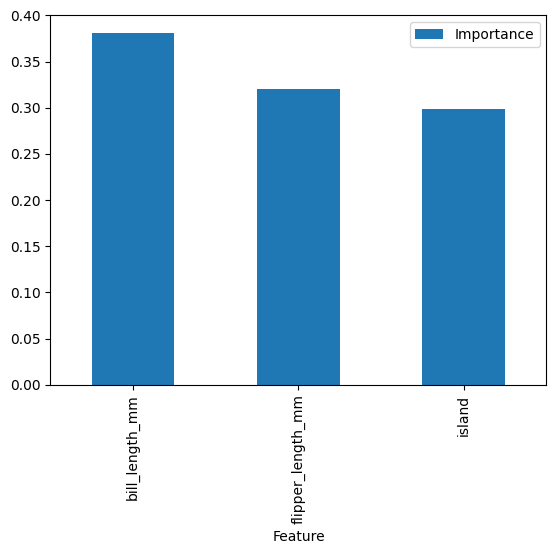

In [25]:
# After data cleaning and feature engineering, the feature space may change
# For example, you may drop variables, or you may add variables; imagine if you have a "date" variable
# and you extract day, month and year for example.
# Then you ask yourself: how many data cleaning and feature engineering steps does your pipeline have?
# In our case 3: median, categorical_imputer, and ordinal

data_cleaning_feat_eng_steps = 3

# We get these steps with steps[] starting from 0 until the value we assigned above
# Then we transform() the train set and extract the columns

columns_after_data_cleaning_feat_eng = Pipeline(best_pipeline.steps[:data_cleaning_feat_eng_steps])\
                                        .transform(X_train).columns

# We get the boolean list indicating the best features with best_pipeline['feat_selection'].get_support()
# and use this list to subset columns_after_data_cleaning_feat_eng

best_features = columns_after_data_cleaning_feat_eng[best_pipeline['feat_selection'].get_support()].to_list()

# Create DataFrame to display feature importance
df_feature_importance = pd.DataFrame(data={
    "Feature": best_features,
    "Importance": best_pipeline['model'].feature_importances_
}).sort_values(by='Importance', ascending=False)

# Most important features statement and plot
print(f"* These are the {len(best_features)} most important features in descending order. "
      f"The model was trained on them:\n{df_feature_importance['Feature'].to_list()}")

df_feature_importance.plot(kind='bar', x='Feature', y='Importance')
plt.show()

In [53]:
clf_performance(X_train=X_train, y_train=y_train,
                X_test=X_test, y_test=y_test,
                pipeline=best_pipeline,
                label_map=df['species'].unique())

#### Train Set ####
--- Confusion Matrix ---
                     Actual Adelie Actual Chinstrap Actual Gentoo
Prediction Adelie              121                0             0
Prediction Chinstrap             0               51             0
Prediction Gentoo                0                0           103


--- Classification Report ---
              precision    recall  f1-score   support

      Adelie       1.00      1.00      1.00       121
   Chinstrap       1.00      1.00      1.00        51
      Gentoo       1.00      1.00      1.00       103

    accuracy                           1.00       275
   macro avg       1.00      1.00      1.00       275
weighted avg       1.00      1.00      1.00       275



#### Test Set ####
--- Confusion Matrix ---
                     Actual Adelie Actual Chinstrap Actual Gentoo
Prediction Adelie               31                0             0
Prediction Chinstrap             0               17             0
Prediction Gentoo                0

#### Refit with the most important Features!

In [54]:
best_features

['island', 'bill_length_mm', 'flipper_length_mm']

In [56]:
X_train, X_test, y_train, y_test = train_test_split(
                                        df.drop(['species'], axis=1),
                                        df['species'],
                                        test_size=0.2,
                                        random_state=(101))
print("* Train set:", X_train.shape, y_train.shape,"\n* Test set:", X_test.shape, y_test.shape)         

X_train = X_train.filter(best_features)
X_test = X_test.filter(best_features)

print("* Train set:", X_train.shape, y_train.shape,"\n* Test set:", X_test.shape, y_test.shape)         


* Train set: (275, 6) (275,) 
* Test set: (69, 6) (69,)
* Train set: (275, 3) (275,) 
* Test set: (69, 3) (69,)


In [60]:
X_train.head(3)

,island,bill_length_mm,flipper_length_mm
336,Biscoe,44.5,217.0
32,Dream,39.5,188.0
39,Dream,39.8,184.0


In [68]:
def PipelineOptimization(model):
    pipeline_base = Pipeline([
        ('median', MeanMedianImputer(imputation_method='median',
                                     variables=['bill_length_mm', 'flipper_length_mm'])),
        
        ('ordinal', OrdinalEncoder(encoding_method='arbitrary',
                                    variables=['island'])),
        ('feat_scaling', StandardScaler()),
        
        ('model', model)                                                                                                                                         
    ])  

    return pipeline_base    

In [69]:
models_search = {'ExtraTreesClassifier' : ExtraTreesClassifier(random_state=0),}
models_search

{'ExtraTreesClassifier': ExtraTreesClassifier(random_state=0)}

In [70]:
grid_search_pipelines[best_model].best_params_

{}

In [71]:
params_search = {'ExtraTreesClassifier': {'model__n_estimators':[20]},
}
params_search

{'ExtraTreesClassifier': {'model__n_estimators': [20]}}

In [72]:
search = HyperparameterOptimizationSearch(models=models_search, params=params_search)
search.fit(X_train,y_train,
           scoring='accuracy',
           n_jobs=-1,
           cv=2)


Running GridSearchCV for ExtraTreesClassifier

Fitting 2 folds for each of 1 candidates, totalling 2 fits


In [74]:
grid_search_summary, grid_search_pipelines = search.score_summary(sort_by='mean_score')
grid_search_summary

,estimator,min_score,mean_score,max_score,std_score,model__n_estimators
0,ExtraTreesClassifier,0.978102,0.978182,0.978261,0.000079,20


In [75]:
best_pipeline = grid_search_pipelines[best_model].best_estimator_
best_pipeline

Pipeline(steps=[('median',
                 MeanMedianImputer(variables=['bill_length_mm',
                                              'flipper_length_mm'])),
                ('ordinal',
                 OrdinalEncoder(encoding_method='arbitrary',
                                variables=['island'])),
                ('feat_scaling', StandardScaler()),
                ('model',
                 ExtraTreesClassifier(n_estimators=20, random_state=0))])

In [3]:
# After data cleaning and feature engineering, the feature space may change
# For example, you may drop variables, or you may add variables; imagine if you have a "date" variable
# and you extract day, month and year for example.
# Then you ask yourself: how many data cleaning and feature engineering steps does your pipeline have?
# In our case 3: median, categorical_imputer, and ordinal

data_cleaning_feat_eng_steps = 2

# We get these steps with steps[] starting from 0 until the value we assigned above
# Then we transform() the train set and extract the columns

columns_after_data_cleaning_feat_eng = Pipeline(best_pipeline.steps[:data_cleaning_feat_eng_steps])\
                                        .transform(X_train).columns

# We get the boolean list indicating the best features with best_pipeline['feat_selection'].get_support()
# and use this list to subset columns_after_data_cleaning_feat_eng

best_features = columns_after_data_cleaning_feat_eng

# Create DataFrame to display feature importance
df_feature_importance = pd.DataFrame(data={
    "Feature": best_features,
    "Importance": best_pipeline['model'].feature_importances_
}).sort_values(by='Importance', ascending=False)

# Most important features statement and plot
print(f"* These are the {len(best_features)} most important features in descending order. "
      f"The model was trained on them:\n{df_feature_importance['Feature'].to_list()}")

df_feature_importance.plot(kind='bar', x='Feature', y='Importance')
plt.show()

NameError: name 'best_pipeline' is not defined

In [77]:
clf_performance(X_train=X_train, y_train=y_train,
                X_test=X_test, y_test=y_test,
                pipeline=best_pipeline,
                label_map=df['species'].unique())

#### Train Set ####
--- Confusion Matrix ---
                     Actual Adelie Actual Chinstrap Actual Gentoo
Prediction Adelie              121                0             0
Prediction Chinstrap             0               51             0
Prediction Gentoo                0                0           103


--- Classification Report ---
              precision    recall  f1-score   support

      Adelie       1.00      1.00      1.00       121
   Chinstrap       1.00      1.00      1.00        51
      Gentoo       1.00      1.00      1.00       103

    accuracy                           1.00       275
   macro avg       1.00      1.00      1.00       275
weighted avg       1.00      1.00      1.00       275



#### Test Set ####
--- Confusion Matrix ---
                     Actual Adelie Actual Chinstrap Actual Gentoo
Prediction Adelie               31                0             0
Prediction Chinstrap             0               17             0
Prediction Gentoo                0